         time location  PM10
4     2010.01    대전광역시    48
19    2010.02    대전광역시    39
34    2010.03    대전광역시    52
49    2010.04    대전광역시    41
64    2010.05    대전광역시    52
...       ...      ...   ...
2123  2021.06    대전광역시    31
2139  2021.07    대전광역시    16
2155  2021.08    대전광역시    18
2171  2021.09    대전광역시    15
2187  2021.10    대전광역시    27

[142 rows x 3 columns]


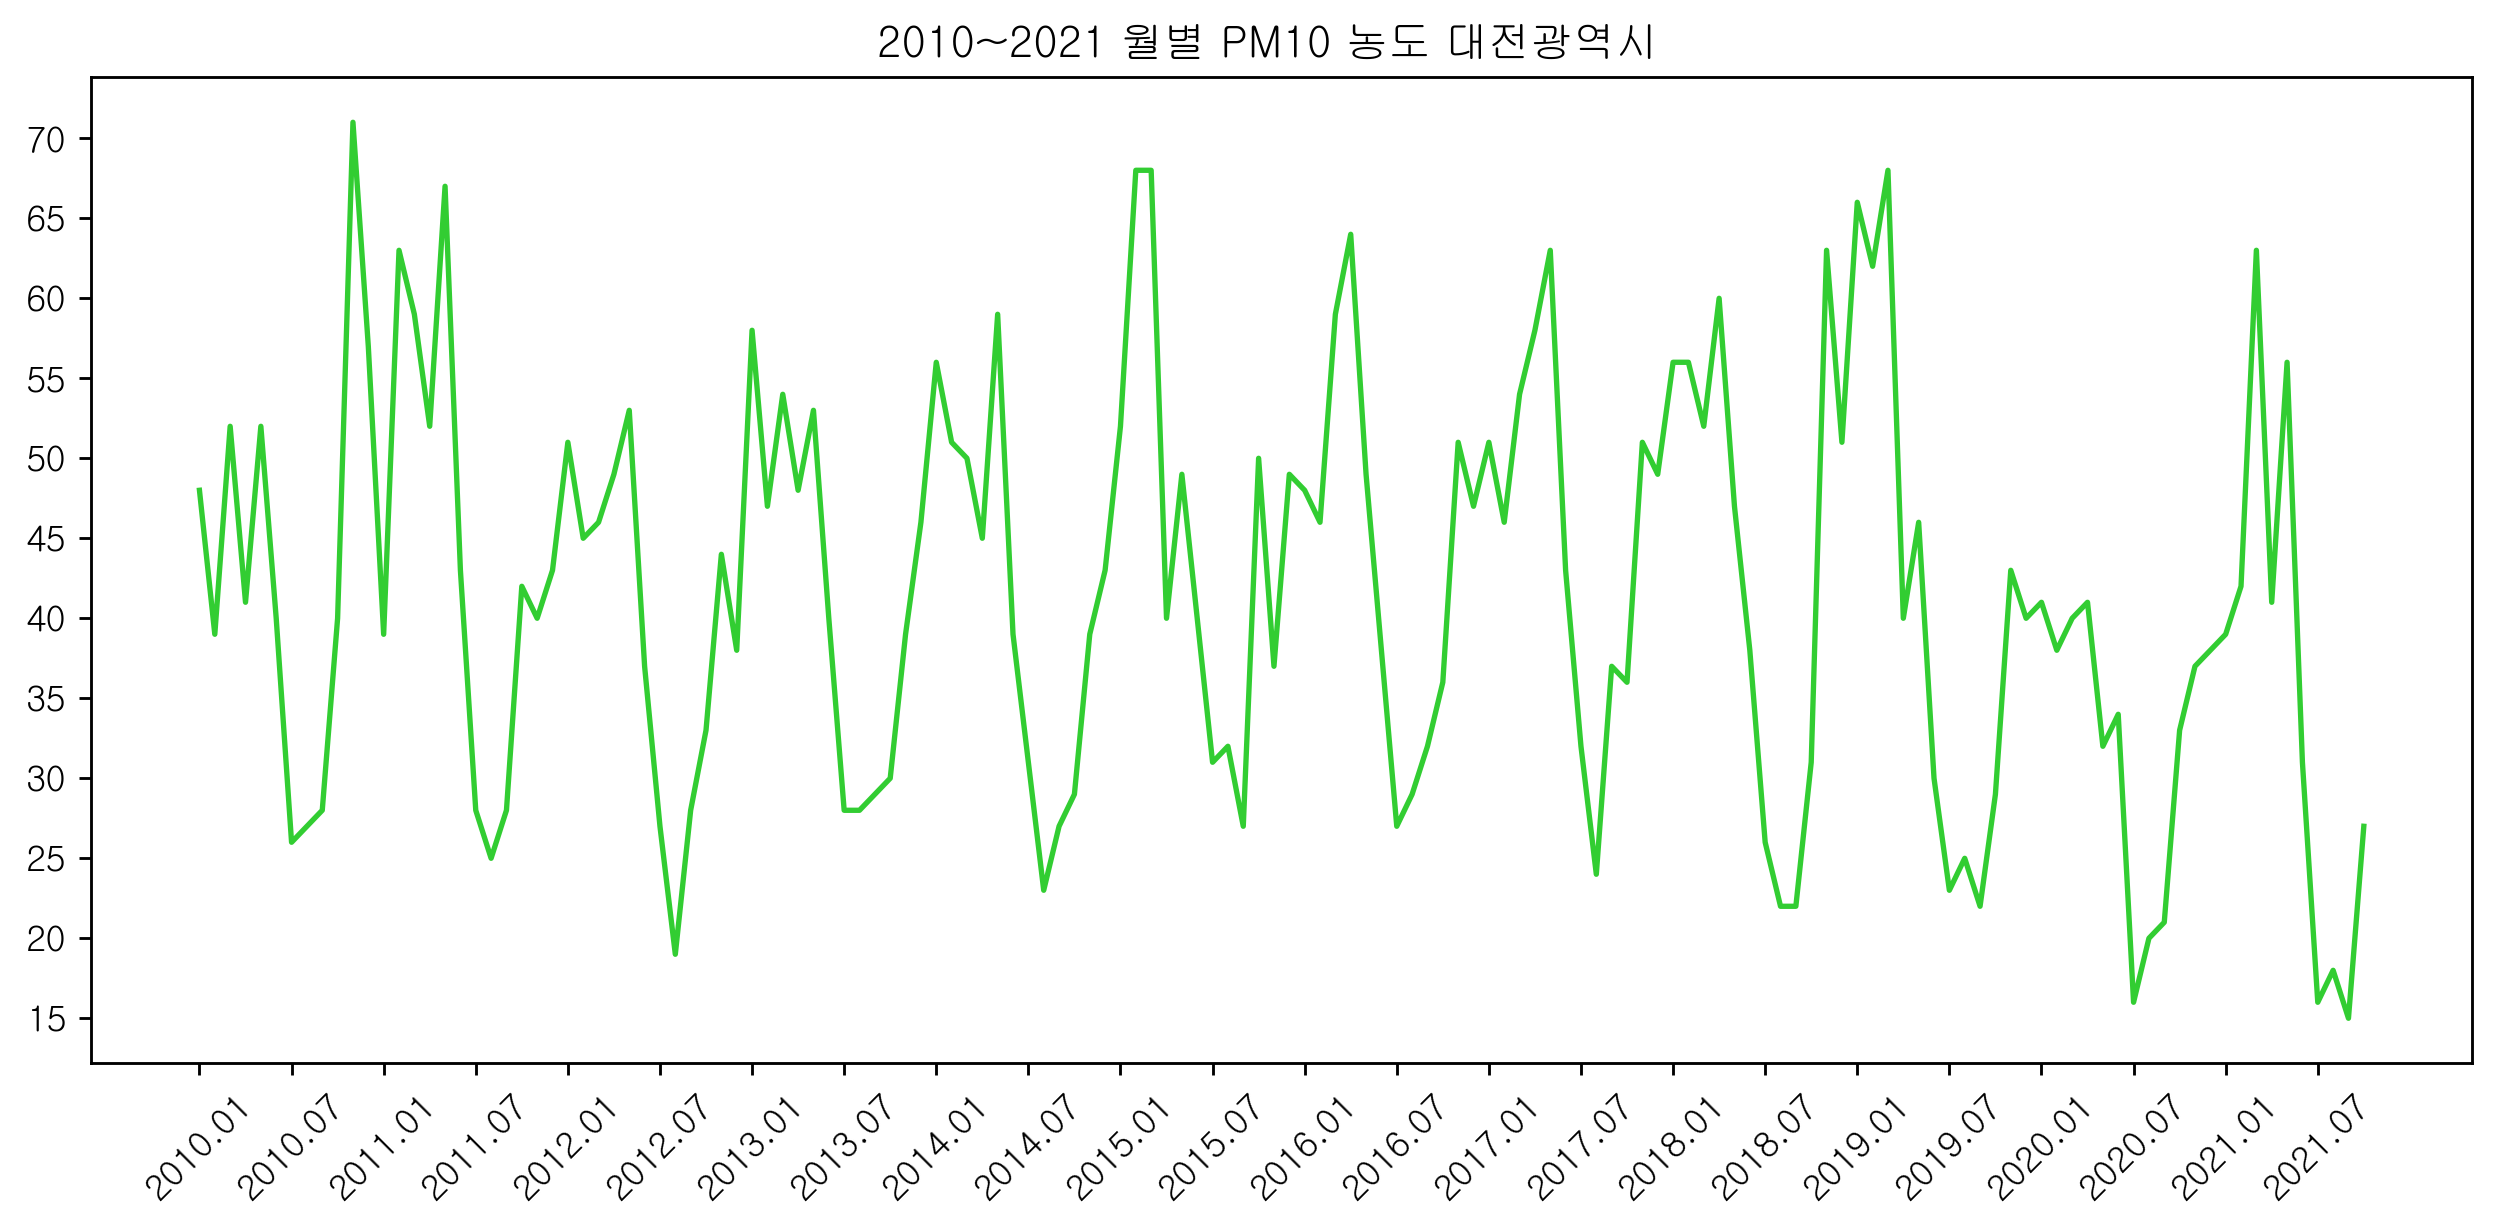

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
#함수 자동화 도전
lo = input("지역 이름을 넣어주세요: ")
def auto(lo):
    #encoding='cp949'를 넣어 한국어가 깨지지 않게 csv 파일 불러오기 
    df = pd.read_csv("m10.csv", encoding='cp949')
    #"도평균" 컬럼 삭제
    df = df.drop(['구분(2)'], axis=1) 
    #컬럼 이름 알기 쉽게 변경
    df.columns = ['time','location','PM10'] 
    #20xx.1 뒤에 0이 없는 것을 소수점 뒤 2자리까지 표시
    #빈 자리는 0으로 채우는 방식으로 20xx.1을 20xx.10으로 변경
    df['time'] = df['time'].apply(lambda x: '{:.2f}'.format(x))
    #확인
    #df.dtypes
    #특수문자 제거(*)
    df["PM10"] = df["PM10"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
    df.rename(index=lambda x: "{}".format(x+1))
    #확인
    #print(df.iloc[440])
    #저장
    #df.to_csv("s.csv", mode='w', encoding='cp949')
    #서울시(특정시)만 뽑아내기
    df_s = df[df['location'].str.contains(lo)]
    #pm25타입을 object에서 int32로 변경
    df_s = df_s.astype({'PM10':'int32'})
    pd.to_numeric(df_s['time'], errors='coerce')
    #인덱스 값 변경(작동안됨)
    #df_s.rename(index=lambda x: "{}".format(x+1))
    #data type 확인
    print(df_s)
    # 그래프 그리기
    plt.figure(figsize=(12,5), dpi = 256)
    xs = df_s['time'].to_list()
    ys = df_s['PM10'].to_list()
    plt.plot(xs, ys, color = "limegreen")
    plt.xticks(ticks=xs, labels=xs, rotation=45)
    #그래프 크기 지정
    #x축 y축 표시될 숫자 편집
    plt.locator_params(axis='x', nbins=len(xs)/6)
    plt.locator_params(axis='y', nbins=len(ys)/10)
    #제목
    plt.title(f"2010~2021 월별 PM10 농도 {lo}  ")
    #그래프 출력
    plt.show()    
 
auto(lo)